# CNMF demo pipeline: Intro
This demo presents a full pipeline for the analysis of a two-photon calcium imaging dataset using the CaImAn (**Ca**lcium **Im**aging **An**alysis) software package. Starting with loading the original movie, it demonstrates how to use Caiman's built-in tools for the following analysis steps:

![full workflow cartoon](../../docs/img/full_cnmf_workflow.jpg)

1) Apply the NoRMCorre (nonrigid motion correction) algorithm for motion correction.
2) Apply the constrained nonnegative matrix factorization (CNMF) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.  
3) Apply quality control metrics to evaluate the initial estimates, and narrow down to the final set of estimates.

The CNMF algorithm is best for data with relatively low background noise, like most two-photon data and *some* one photon data (e.g., certain light sheet data). For a demo analysis pipeline of a one-photon microendoscopic data set see `demo_pipeline_cnmfE.ipynb`.

<div class="alert alert-info">
    <h2 style="margin-top: 0;">Getting more help</h2>
    More detailed background information about CNMF can be found in the <a href="https://pubmed.ncbi.nlm.nih.gov/26774160/">original CNMF paper</a> and <a href="https://pubmed.ncbi.nlm.nih.gov/30652683/">the Caiman paper</a>. If you have specific questions about this demo, or the underlying algorithms, you can ask questions at <a href="https://github.com/flatironinstitute/CaImAn/discussions">GitHub Discussions</a>. If you find a bug or you have a feature request, feel free to <a href="https://github.com/flatironinstitute/CaImAn/issues">open an issue at our Github repo</a>.
</div>

## Imports and general setup
We first need to import the Python libraries we will use in the rest of the notebook and tweak some general settings. Don't worry about these details now, we will explain the important things when they come up. Note in the following, we import `caiman` as `cm`, so when you see `cm` in the rest of the notebook, it just means you are using something from the Caiman package.  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
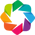

In [78]:
import bokeh.plotting as bpl
import cv2
import datetime
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil
from pathlib import Path

try:
    cv2.setNumThreads(0)
except():
    pass

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
except NameError:
    pass

import caiman as cm
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import cnmf, params
from caiman.utils.utils import download_demo
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

bpl.output_notebook()
hv.notebook_extension('bokeh')

Continuing with our basic setup, we will set up a logger, and also set some environment variables in case that wasn't done already in your shell. If you want to learn more about Caiman's logger functionality, or tweak your logger (e.g., to log to file instead of your console), see [Appendix 1: Logging](#logging_explained). 

In [ ]:
# set up logging
logging.basicConfig(format="{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}",
                    filename=None, 
                    level=logging.WARNING, style="{") #logging level can be DEBUG, INFO, WARNING, ERROR, CRITICAL

# set env variables 
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

## Specify data to be processed
For this demo, we are going to analyze the data file `Sue_2x_3000_40_-46.tif`. This 3000-frame movie, provided by Sue Koay and David Tank (Princeton University), is two-photon data from supragranular parietal cortex of a GCaMP6f-expressing mouse during a virtual reality task. It was collected at 30Hz, and to save space, the demo data has been spatially cropped and downsampled by a factor of 2 compared to the original.  

To get the data, we will use Caiman's built-in `download_demo()` function. It will download the data to  `~/caiman_data/example_movies/` where `~` is your home directory (the path format and home directory will depend on your operating system). If you already have the movie, it will just return the path to the movie. 

In [ ]:
movie_path = download_demo('Sue_2x_3000_40_-46.tif')
print(f"Original movie for demo is in {movie_path}")

If you want to adapt this demo for your own data, just direct the `movie_path` variable to your own movie:

    movie_path = 'full/path/to/your/movie.filetype'

If you have a recording system that breaks up the data across multiple files, see [Appendix 2: Working with multiple files](#multiple_files). 

<div class="alert alert-info">
    <h2 style="margin-top: 0;">File types that Caiman can read</h2>
    While this demo uses a movie that has been stored in <i>tif</i> format, Caiman can handle movies in multiple common (and not so common) formats, including:

    hdf5/h5, n5, zarr, avi, nwb, npz
    
</div>

## Load and visualize raw data
Caiman has a built-in movie class that you can use to view your movie. 

The movie object has many convenient features. Once you have loaded the movie (using `cm.load()`), you can view your raw data using `movie.play()`. This `play()` function has multiple parameters you can explore, including: 

    gain: brightness 
    fr:  frame rate
    magnification: scale the size of the display  
    qmax, q_min: percentile for setting vmax, vmin -- below vmin is black, above vmax is white
    plot_text (Bool): show the frame number
    
The movie object also has a `resize()` method, which we use in the following to downsample the movie by 5x before playing using the `downsampling_ratio`. 

Playing the movie uses the OpenCV library, so if you set `display_movie` to `True`, the following cell will run a blocking function (a function that blocks execution of all other code until it is stopped), opening a separate window which doesn't run in Jupyter. You will need to press `q` on that window to close it. 

In [ ]:
# press q to close
display_movie = True  # set to False if you want to skip 
if display_movie:
    movie_orig = cm.load(movie_path)  # add subindices here if you want to load partial movie for viewing
    downsampling_ratio = 0.2
    movie_orig.resize(fz=downsampling_ratio).play(gain=1.3,
                                                  q_max=99.5, 
                                                  fr=30,
                                                  plot_text=True,
                                                  magnification=4,
                                                  backend='opencv')

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">Displaying large files</h2>
    Loading a movie with <em>cm.load()</em> pulls all of the data into memory, which is not always feasible. When working with your own data, you might need to adapt the above code when working with extremely large files. Caiman provides many tools to handle this use case, which are discussed in <a href="#display_large">Appendix 3: Displaying large files</a>.
</div>

Let's also create a couple of summary images of the movie, including a *maximum projection* (the maximum value of each pixel) and a *correlation image* (how correlated each pixel is with its neighbors). If a pixel comes from a neural element (soma, axon, dendrite) it will tend to be highly correlated with its neighbors. 

In [ ]:
max_projection_orig = np.max(movie_orig, axis=0)
correlation_image_orig = cm.local_correlations(movie_orig, swap_dim=False)
correlation_image_orig[np.isnan(correlation_image_orig)] = 0 # get rid of NaNs, if they exist

In [ ]:
f, (ax_max, ax_corr) = plt.subplots(1,2,figsize=(8,4))
ax_max.imshow(max_projection_orig, cmap='gray', vmin=0, vmax=700);
ax_max.set_title("Max Projection Orig", fontsize=12);

ax_corr.imshow(correlation_image_orig, cmap='gray', vmin=0.05, vmax=0.45)
ax_corr.set_title('Correlation Image Orig', fontsize=12);

These images will not be particularly sharp yet, as there is still a good deal of motion in the movie. 

## Set initial parameters
In general in Caiman, estimators are first initialized with a set of parameters, and then they are fit against actual data in a separate step. In this section, we'll define a `parameters` object that will subsequently be used to initialize our different estimators. 

The parameters are divided into different categories. We will not discuss them in detail in this section, but will go over them when needed (and note that in this notebook we will mostly focus on CNMF):

In [ ]:
# general dataset-dependent parameters
fr = 30                     # imaging rate in frames per second
decay_time = 0.4            # length of a typical transient in seconds
dxy = (2., 2.)              # spatial resolution in x and y in (um per pixel)

# motion correction parameters
strides = (48, 48)          # start a new patch for pw-rigid motion correction every x pixels
overlaps = (24, 24)         # overlap between patches (width of patch = strides+overlaps)
max_shifts = (6,6)          # maximum allowed rigid shifts (in pixels)
max_deviation_rigid = 3     # maximum shifts deviation allowed for patch with respect to rigid shifts
pw_rigid = True             # flag for performing non-rigid motion correction

# CNMF parameters for source extraction and deconvolution
p = 1                       # order of the autoregressive system (set p=2 if there is visible rise time in data)
gnb = 2                     # number of global background components (set to 1 or 2)
merge_thr = 0.85            # merging threshold, max correlation allowed
bas_nonneg = False          # enforce nonnegativity constraint on calcium traces (technically on baseline)
rf = 15                     # half-size of the patches in pixels (patch width is rf*2 + 1)
stride_cnmf = 6             # amount of overlap between the patches in pixels (overlap is stride_cnmf+1) 
K = 4                       # number of components per patch
gSig = np.array([4, 4])     # expected half-width of neurons in pixels 
gSiz = 2*gSig + 1           # half-width of bounding box created around neurons during initialization
method_init = 'greedy_roi'  # initialization method (if analyzing dendritic data see demo_dendritic.ipynb)
ssub = 1                    # spatial subsampling during initialization 
tsub = 1                    # temporal subsampling during intialization

# parameters for component evaluation
min_SNR = 2.0               # signal to noise ratio for accepting a component
rval_thr = 0.85             # space correlation threshold for accepting a component
cnn_thr = 0.99              # threshold for CNN based classifier
cnn_lowest = 0.1            # neurons with cnn probability lower than this value are rejected

We place the above parameter values in a dictionary that is passed to the `CNMFParams` class (those parameters *not* explicitly defined will assume default values):

In [ ]:
parameter_dict = {'fnames': movie_path,
                  'fr': fr,
                  'dxy': dxy,
                  'decay_time': decay_time,
                  'strides': strides,
                  'overlaps': overlaps,
                  'max_shifts': max_shifts,
                  'max_deviation_rigid': max_deviation_rigid,
                  'pw_rigid': pw_rigid,
                  'p': p,
                  'nb': gnb,
                  'rf': rf,
                  'K': K, 
                  'gSig': gSig,
                  'gSiz': gSiz,
                  'stride': stride_cnmf,
                  'method_init': method_init,
                  'rolling_sum': True,
                  'only_init': True,
                  'ssub': ssub,
                  'tsub': tsub,
                  'merge_thr': merge_thr, 
                  'bas_nonneg': bas_nonneg,
                  'min_SNR': min_SNR,
                  'rval_thr': rval_thr,
                  'use_cnn': True,
                  'min_cnn_thr': cnn_thr,
                  'cnn_lowest': cnn_lowest}

parameters = params.CNMFParams(params_dict=parameter_dict) # CNMFParams is the parameters class

This parameters object (`parameters`) is basically a collection of dictionaries that each contains different categories of parameters. These different dictionaries can be accessed using dot notation.  Some are related to the dataset in general (`parameters.data`), while most are related to specific aspects of the workflow such as motion correction (`parameters.motion`), quality evaluation (`parameters.quality`), and others.
 
For instance, if you want to inspact the dataset-dependent parameters:

In [ ]:
parameters.data

To access a particular parameter in this parameter field is just to access a value of a dictionary using the appropriate key. So to get the frame rate:

In [ ]:
parameters.data['fr'] 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">To dig deeper into this design</h2>  
    To see more about the design of Caiman estimators and parameters, and their decoupling, see <a href="#caiman_estimators">Appendix 4: Estimators and parameters</a>.
</div>

## Setting up a cluster
Caiman is optimized for parallel computing, and distributes computations to multiple CPU cores for motion correction and CNMF (there is also an option to run motion correction on the GPU, but we will not focus on that here). Setting up the multicore processing is done with the `setup_cluster()` function below. 

First, let's see how many CPUs we have available, and set the number of processors we want to use. If you set `num_processors_to_use` to `None`, then `setup_cluster()` will set it one less than the total number available:

In [ ]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = 8  # None

Set up a cluster of processors. If one has already been set up (the `multiprocessing_pool` variable is already in your namespace), then that cluster will be closed and a new one created.

In [ ]:
if 'multiprocessing_pool' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=multiprocessing_pool)
print("Setting up new cluster")
_, multiprocessing_pool, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

We won't focus much on the outputs, except for `multiprocessing_pool`. This is the multiprocessing pool that will be fed into Caiman's subsequent processing steps. In these later steps, if you set the parameter `dview` to `multiprocessing_pool`, then parallel processing will be used. If instead you set `dview` to `None` then no parallel processing will be used. This latter option can be important when debugging, as the logger doesn't typically work for multithreaded operations.

For more details, please see [Appendix 5: Cluster Setup](#the_cluster). 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">Optimizing performance</h2>  
If you hit memory issues later, there are a few things you can do. First, you may want to lower the number of processors you are using. Each processor uses more RAM, and on a workstation with many processors, you can sometimes get better performance by reducing <em>num_processors_to_use</em>. This is a bit of an art form, so the best way to determine the optimal number is by trial and error. When you set <em>num_processors_to_use</em> variable to <em>None</em>, it defaults to <i>one</i> less than the total number of CPU cores available (the reason we don't automatically set it to the total number of cores is because in practice this almost universally leads to worse performance). Also, while you can set <em>num_processors_to_use</em> to a number <i>greater</i> than the available number of CPU cores, we <b>do not</b> recommend it for performance reasons.

Second, if your system has less than 32GB of RAM, and things are running slowly or you are running out of memory, then get more RAM. While you can sometimes get away with less, we recommend a *bare minimum* level of 16GB of RAM, but more is better. 32GB RAM is acceptable, 64GB is good, 128GB is great. Obviously, this will depend on the size of your data sets. 

Third, if none of your memory optimizations work, you may just have too much data for offline CNMF. For this case, we also provide an online version of CNMF (OnACID), which uses a small number of frames to initialize the spatial and temporal components, and iteratively updates them with new data. This uses much less memory than the offline approach. The demo notebook for OnACID is found in <a href="./demo_OnACID_mesoscope.ipynb">demo_OnACID_mesoscope.ipynb</a>, and also see the <a href="https://pubmed.ncbi.nlm.nih.gov/30652683/">Caiman paper</a> for more discussion.
</div>

## Motion Correction
The first substantive step in our analysis pipeline is to remove motion artifacts from the original movie:

<img src="../../docs/img/normcorre_workflow.jpg" alt="motion correction workflow" width="700"/>

It is *very* important to get rid of motion artifacts, as the subsequent CNMF source separation algorithm assumes that each pixel represents the same region of space

First, we initialize the motion correction estimator using the parameters that we set above:   

In [ ]:
mot_correct = MotionCorrect(movie_path, dview=multiprocessing_pool, **parameters.motion)

This notebook focuses on CNMF, not motion correction, but let's consider a couple of the motion correction parameters:

- `pw_rigid=True` tells us that we are going to perform piecewise rigid motion correction using the nonrigid motion correction (NoRMCorre) algorithm (this is because the data seems to exhibit some non-uniform motion). If your data exhibits uniform motion across the field of view, set this to `False` for efficiency.
- NoRMCorre will split the movie into patches that repeat every 48 pixels (`strides`), and have 24 pixels of overlap (`overlaps`): the total patch width is 72 (the sum of stride and overlap).

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">For more on motion correction</h2>  
For a detailed exploration of Caiman's motion correction pipeline, see the <a href="./demo_motion_correction.ipynb">demo_motion_correction.ipynb</a> demo.
</div>

The next step is to actually perform motion correction using the `motion_correct()` method on the estimator we built. You may see some warnings about negative movie averages: you can ignore them.

In [ ]:
%%time
#%% Run piecewise-rigid motion correction using NoRMCorre
mot_correct.motion_correct(save_movie=True);

Optionally inspect the results by comparing the original movie: note we are turning the gain up here to highlight motion.

In [ ]:
#%% compare with original movie  : press q to quit
display_movie = True
if display_movie:
    movie_orig = cm.load(movie_path) # in case it was not loaded earlier
    movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
    ds_ratio = 0.2
    cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                    movie_corrected.resize(1, 1, ds_ratio)], 
                    axis=2).play(fr=20, 
                                 gain=2, 
                                 magnification=2)  # press q to exit

Let's look at the max projection and correlation image of the motion corrected movies. In movies with a lot of movement they will look quite a bit different than the original movie, more "crisp" because they are no longer blurred by movement:

In [ ]:
max_projection = np.max(movie_corrected, axis=0)
correlation_image = cm.local_correlations(movie_corrected, swap_dim=False)
correlation_image[np.isnan(correlation_image)] = 0 # get rid of NaNs, if they exist

f, ((ax_max_orig, ax_max), (ax_corr_orig, ax_corr)) = plt.subplots(2,2,figsize=(6,6), sharex=True, sharey=True)

ax_max_orig.imshow(max_projection_orig, cmap='viridis')
ax_max_orig.set_title("Max Motion Orig", fontsize=12);

ax_max.imshow(max_projection, cmap='viridis')
ax_max.set_title("Max Motion Corrected", fontsize=12);

ax_corr_orig.imshow(correlation_image_orig, cmap='viridis')
ax_corr_orig.set_title('Correlation Image Orig', fontsize=12);

ax_corr.imshow(correlation_image, cmap='viridis')
ax_corr.set_title('Correlation Motion Corrected', fontsize=12);

plt.tight_layout()

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">If you don't need to run motion correction</h2>  
If you don't need to run motion correction, for instance if your movie has no movement (which is often the case in slice praparations), you can directly memory map your file to prepare for subsequent  processing:

    mc_memmapped_fname = cm.save_memmap(movie_path, base_name='memmap_',
                                         order='C', border_to_0=0, dview=multiprocessing_pool)

You would obviously need to modify the rest of your code accordingly (e.g., don't run motion correction, don't run the following code cell that creates a memmapped file from motion correction). 
</div>

## Memory mapping 
The motion-corrected data was saved as as a memory mapped file in `mot_correct.mmap_file` in F-order. The cell below saves the same motion corrected data in a second memory mapped file (name stored in `mc_memmapped_fname`) in C-order, which is optimized for CNMF. For more details on this process, see [Appendix 6: Memory Mapping](#memmapping):

In [ ]:
border_to_0 = 0 if mot_correct.border_nan == 'copy' else mot_correct.border_to_0 # trim border against NaNs
mc_memmapped_fname = cm.save_memmap(mot_correct.mmap_file, 
                                        base_name='memmap_', 
                                        order='C',
                                        border_to_0=border_to_0,  # exclude borders, if that was done
                                        dview=multiprocessing_pool)

Now we will create usable arrays from the memory mapped file we just created using the built-in caiman function `load_memmap()`. This lets us treat the data *as if* it were in memory, but leaves it on disk and allows Caiman to perform out-of-core computations (again, see [Appendix 6](#memmapping) for more details).

In [ ]:
Yr, dims, num_frames = cm.load_memmap(mc_memmapped_fname)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F') #reshape frames in standard 3d format (T x X x Y)

Here, we have used a caiman built-in function to load the memory mapped file to variable `Yr`, which is is the motion corrected movie reshaped so that each frame is in a single column. We have also created a version `images` in more standard movie format (`num_frames x cols x rows`). All of these arrays are memory mapped, so are not loaded into RAM, but reference data on disk. 

Restart the cluster to clean up memory in prep for CNMF run.

In [ ]:
cm.stop_server(dview=multiprocessing_pool)
_, multiprocessing_pool, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                                n_processes=num_processors_to_use, 
                                                                single_thread=False)

# Run CNMF on patches in parallel

Everything is now set up for running CNMF. This algorithm simultaneously extracts the *spatial footprint* and corresponding *calcium trace* for each component. 

![cnmf patch flow image](../../docs/img/cnmf_workflow.jpg)

It also performs *deconvolution*, providing an estimate of the spike count that generated the calcium signal in the movie. 

The algorithm is parallelized as illustrated here:

<img src="../../docs/img/cnmf_patches.jpg" alt="cnmf patch flow" width="500"/>

1) The movie field of view is split into overlapping patches.
2) These patches are processed in parallel by the CNMF algorithm. The degree of parallelization depends on your available computing power: if you have just one CPU then the chunks will be processed sequentially. 
3) The results from all the patches are merged, with special focus on components in overlapping regions -- overlapping components are merged if their activity is highly correlated.
4) Results are refined with additional iteratoins of CNMF.

As discussed above, Caiman's main algorithms are run in two steps: first the estimators are *initialized* with a set of parameters, and then they are *fit* against actual data. Let's initialize our CNMF estimator object:

In [ ]:
cnmf_model = cnmf.CNMF(n_processes, 
                       params=parameters, 
                       dview=multiprocessing_pool)

Once initialized, we we could immediately run `cnmf_model.fit(images)` if we knew the parameters were good. The parameters in your CNMF estimator object are accessable in `cnmf_model.params`. However, before running the algorithm, let's discuss the more critical parameters that you will most likely need to change in the future when running CNMF on your own data. 

### Key parameters for CNMF

`rf (int)`: *patch half-width*

> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The full patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the expected neuron diameter. This is so that the CNMF algorithm will be able to properly estimate local background activity. Also the larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then no parallelization will be used and CNMF will be run on the entire field of view. 

`stride_cnmf (int)`: *patch overlap*

> `stride_cnmf` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably be called 'overlap' instead of 'stride'. 
 
 
`gSig (int, int)`: *half-width of neurons*

> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). Used during initialization, technically it is the sigma parameter in a Gaussian filter run on all the images. If the filter is appropriately matched to your data, you will get a much better estimate, so this is one of the most important parameters. It also determines the value of `gSiz`, which is set to `2*gSig + 1` for CNMF. `gSiz` is the width of a bounding box created around each seed pixel during initilialization -- if after running `refit()` below your neurons end up looking square or artificially cut off, you may need to increase `gSiz`.
    
    
`K (int)`: *components per patch*

> `K` is the number of components you expect per patch. You should obviously adapt this to the density of components in your data, and the current `rf` parameter. We suggest pick `K` based on the more dense patches in your movie, as it is easy to remove false positives later in the component evaluation stage. However, if you pick `K` much too high, the algorithm will take longer to run, and the false positives will become inconvenient to sift through later.
    
`merge_thr (float)`: *merge threshold* 

> `merge_thr` is the merge threshold. If two spatially overlapping components are correlated above this value, they will be merged into one component. The correlation coefficient is calculated using their respective calcium traces.  

You typically will set `rf` and `stride` infrequently, so it is mainly `K`, `gSig`, and `merge_thr` that you will tweak when analyzing a given session. Note these are not the *only* important parameters. They just tend to be the *most* important, while many others tend to depend on your calcium indicator or other factors that don't vary within an experiment, and are listed above in the parameter setting section and [in the docs](https://caiman.readthedocs.io/en/master/Getting_Started.html#parameters).

It is useful to know the original values of the key parameters, and we can access them using the helper function `key_params()` (we include `gSiz` in this list just so that if you tweak `gSig`, you will remember to change `gSiz` as well):

In [ ]:
def key_params(cnmf_model):
    """
    Convenience function to return critical parameters given CNMF estimator object.
    Returns dictionary with values of rf, stride, gSig, gSiz, K, merge_threshold
    
    Note: 
    gSiz is included because it depends on gSig and you want to make sure to change it when you change gSig.
    These are not set in stone: tweak for your own needs!
    """
    rf = cnmf_model.params.patch['rf']
    stride = cnmf_model.params.patch['stride']
    gSig = cnmf_model.params.init['gSig']
    gSiz = cnmf_model.params.init['gSiz']
    K = cnmf_model.params.init['K']
    merge_thr = cnmf_model.params.merging['merge_thr']
    
    key_params = {'rf': rf, 
                  'stride': stride,
                  'gSig': gSig,
                  'gSiz': gSiz,
                  'K': K,
                  'merge_thr': merge_thr}
    
    return key_params

In [ ]:
print(f"Initial key params: {key_params(cnmf_model)}")

### How to pick parameters
How do you determine what values to use for the key parameters with your own data? The previous section provided some guidelines on how to select them via inspection of your data. Basically: look at your movie, or a summary image for your movie, and pick values close to those suggested by the guidelines above. There is typically no *perfect* value, and there will usually be some trial-and-error involved: luckily the models are fairly robust to small changes in their values.

It is helpful to use `view_quilt()` function to see if our critical spatial parameters are in the right ballpark (note we recommend running this viewer in interactive qt mode so you can interact with it and get a better feel for the parameters): 

In [ ]:
# calculate stride and overlap from parameters
cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_patch_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_stride = cnmf_patch_width - cnmf_patch_overlap
print(f'Patch width: {cnmf_patch_width} , Stride: {cnmf_patch_stride}, Overlap: {cnmf_patch_overlap}');

# plot the patches
patch_ax = view_quilt(correlation_image, 
                      cnmf_patch_stride, 
                      cnmf_patch_overlap, 
                      vmin=0.1, 
                      vmax=0.5, 
                      figsize=(6,6));
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_patch_overlap}');

#### Evaluate spatial parameters using the quilt plot
- Is the patch width (`2*rf+1`) at least three times the width of a neuron? Yes
- Do individual neurons fit in the overlap region (`stride`)? No, current value of 6 is a bit low, so let's bump `stride` to 9 or 10.
- When in interactive (`qt` or `notebook`) mode, you can zoom and inspect the average width of each neuron in pixels. Is `gSig` about half that? Yes. Each neuron is about 6-8 pixels wide, and `gSig` is 4.
- For `K`: how many neurons are in each patch? Here you want an upper bound, not an average. The current value of 4 seems good.

If you can't remember the current parameter values, remember you can always use the `key_params()` convenience function to print them out:

In [ ]:
key_params(cnmf_model)

It seems the only parameter we need to change is `stride`. To *change* parameters, Caiman has a built-in `change_params()` function, and you can iteratively go through the following cell, tweaking params until you are happy with them based on the `rf/stride/K/gSig` combination for your data. 

Note while you can just change the parameter and keep going, we recommend inspecting the patches that will result using `plot_patches()`, as there can be counterintuitive edge effects with patches that yield a lot of redundancy of computation with certain combinations of `rf` and `stride`, so it is helpful to inspect the results.

In [ ]:
rf_new = rf  # unchanged
stride_new = 10
gsig_new = gSig # unchanged
gsiz_new = gsig_new*2 + 1
k_new = K  # unchanged
merge_thr_new = merge_thr  # unchanged

print(f"Before changing: {key_params(cnmf_model)}")
cnmf_new_params = {'rf': rf_new,
                   'stride': stride_new,
                   'gSig': gsig_new,
                   'gSiz': gsiz_new, 
                   'K': k_new,
                   'merge_thr': merge_thr_new}
cnmf_model.params.change_params(params_dict=cnmf_new_params)


# plot the patches
# calculate stride and overlap from parameters
cnmf_overlap = cnmf_model.params.patch['stride'] + 1
cnmf_patch_width = cnmf_model.params.patch['rf']*2 + 1
cnmf_stride = cnmf_patch_width - cnmf_overlap

patch_ax = view_quilt(correlation_image, 
                        cnmf_stride, 
                        cnmf_overlap, 
                        vmin=0.1,
                        vmax=0.5, 
                        figsize=(6,6));
patch_ax.set_title(f'CNMF Patches Width {cnmf_patch_width}, Overlap {cnmf_overlap}');


print(f"After changing: {key_params(cnmf_model)}")

The new parameters look good, but ultimately the only way to really know is to fit the model with the parameters and see how it does: often you have to iteratively search a bit in parameter space. It's time to run CNMF! Note if you are ever unhappy with your parameters you can always run through an iterative process like the one above to improve them. 

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">Mesmerize your search!</h2>  
It is not always efficient to DIY such iterative parameter search, especially if you end up needing to do a grid search in a large parameter space. <a href=https://github.com/nel-lab/mesmerize-core>Mesmerize</a> is a package built for parameter exploration in Caiman (both for motion correction and the CNMF algorithms) that keeps track of all your different results, and includes powerful GPU-based tools for visualization of results in Jupyter notebooks. 
</div>

### Run CNMF
Now that we are happy with our parameters, let's run the cnmf algorithm using the `fit()` method. 

In [ ]:
%%time
cnmf_fit = cnmf_model.fit(images)

<div class="alert alert-info" markdown="1">
    <h3 style="margin-top: 0;">Run all of the above with one command</h3>  
It is possible to run the combined steps of motion correction, memory mapping, and cnmf fitting in one step using the <em>fit_file()</em> method. We recommend that you familiriaze yourself with the different steps first. It can be useful when testing code, or if sending jobs to a cluster in those cases when you already know the parameter settings.

    cnmf_all = cnmf.CNMF(n_processes, 
                         params=parameters, 
                         dview=multiprocessing_pool)
    cnmf_all.fit_file(motion_correct=True)
</div>

### Inspect the initial estimates
Briefly inspect the results by plotting contours of identified components using `plot_contours_nb()`. 

You can interactively explore this plot in your notebook with the help of the buttons on the right-hand-side of the plot (it was made using the [Bokeh](https://bokeh.org/) library).

In [ ]:
cnmf_fit.estimates.plot_contours_nb(img=correlation_image, cmap='gray');

Note this is just an initial result, which will contain many false positives, which is to be expected. The main concern to watch for here is whether you have lots of false *negatives* (has the algorithm missed neurons?). False negatives are hard to fix later, so if you have an unacceptable number, be sure to go back and re-run CNMF with new parameters.

> If you have a large number of neurons -- you may get a data rate error with some of the notebook plotting commmands. If that happens, you can start your notebook using     
`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`

### Re-run (seeded) CNMF  on the full field of view 
It is typically helpful to refine the initial estimates by re-running the CNMF algorithm seeded just on the estimates from the previous step using the `refit()` method. This can be especially useful if the initial estimates appear unusual: it is often a sign that the algorithm hasn't converged on a solution.

In [ ]:
%%time
cnmf_refit = cnmf_fit.refit(images, dview=multiprocessing_pool)

The spatial contours of the new estimates typically look cleaner and more "neuronal" after running `refit()`:

In [ ]:
cnmf_refit.estimates.plot_contours_nb(img=correlation_image);

You will notice that the estimates look qualitative better, but we still expect false positives. The **component evaluation** stage of the pipeline will evaluate the initial set of estimates, and remove the bad ones. But first, let's disuss the estimates object.

> Note if you are using this notebook to help you run CNMFE, **do not** run this `refit()` step. It is not needed, and not implemented, for CNMFE. 

# The estimates class
The main point of the CNMF algorithm was to perform source separation, to extract the spatial footprints and temporal traces of calcium activity from neurons that were hiding in the raw data. This information, and many useful methods for visualization and analysis, are contained in Caiman's `Estimates` class. An `estimates` object was generated as an attribute of your CNMF model after running `fit()` or `refit()` (e.g., you can find it in `cnmf_refit.estimates`). 

The rest of this notebook, from component evaluation to calculation of DFoF, is effectively an exploration of the properties and methods of the `Estimates` class. Because of its centrality, it is crucial to understand some of the basic attributes of `estimates` when working with Caiman. The most important estimates generated are:

    C: denoised calcium traces (num components x num frames) -- the temporal traces
    A: spatial components (num pixels x num components) - the spatial footprints
    YrA: residual for each calcium trace (num components x num frames)
    S: spike count estimate from deconvolution, if used (num components x num frames)
    F_dff: deltaF/F -- detrended and normalized raw calcium traces (num components x num frames)

To recover raw calcium traces, you can add together the denoised calcium traces and their residuals (`C + YrA`). Note also the `F_dff` calculation is not done automatically, so when you run `fit()/refit()` this field will initially be `None`. We show how to calculate it below.

In [ ]:
# see shape of A and C
cnmf_refit.estimates.A.shape, cnmf_refit.estimates.C.shape

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">More on Estimates</h2>  
The estimates objects contain a great deal of information. The attributes are discussed in more detail <a href="https://github.com/flatironinstitute/CaImAn/wiki/Interpreting-Results">in the documentation</a>, but you might also find exploring the <a href="https://github.com/flatironinstitute/CaImAn/blob/main/caiman/source_extraction/cnmf/estimates.py">source code</a> rewarding. For instance, while most users initially care about the extracted calcium signals <em>C</em> and spatial footprints <em>A</em>, the <b>background noise</b> is an important part of the model in Caiman, and this is also part of the estimate, in fields <em>b</em> and <em>f</em> (which correspond to the spatial and temporal components of the low-rank background model, respectively). We discuss the background model more below.

Note we realize these attribute names like <em>A</em> are not very informative or Pythonic. These names are rooted in mathematical conventions from the original papers, but we may add aliases that are more transparent in a future Caiman release to make things more readable/understandable.
</div>

# Component Evaluation
As already mentioned, the initial estimates produced by CNMF creates many spurious components. Our next step is to do some some quality control, cutting out some of the bad estimates to arrive at our final set of estimates:

![component evaluation image](../../docs/img/evaluation_workflow.jpg)

We will evaluate each component by applying the `evaluate_components()` method. The criteria Caiman uses to evaluate components are:  

- **Signal to noise ratio (SNR)**: a baseline noise estimate is extraced for each raw calcium trace, and SNR during calcium transients is calculated relative to this baseline. It is stored in `estimates.SNR_comp`. Those components with high SNR are higher quality, and less likely to be false positives.
- **Spatial correlation**: the extracted spatial footprints in `estimates.A` should be highly correlated with the fluctuations of activity in the raw movie, at least on those frames when that component is active. The correlation coefficient between an extracted spatial component and calcium fluctuations in a region of the raw data file are stored in `estimates.r_values`. 
- **CNN confidence**: Each spatial component in `estimates.A` is passed through a CNN-based classifier that produces a confidence value between 0 and 1 that the shape is a real neuron. These are stored in `estimates.cnn_preds`.

The first two criteria are illustrated schematically here (see also Figure 2 of <a href="https://elifesciences.org/articles/38173">the Caiman paper</a>):

![component evaluation image](../../docs/img/component_evaluation.jpg)

The `evaluate_components()` method uses the above criteria to sort components into accepted and rejected components. For each criterion, there is a threshold value in `quality` field of the parameters object (the thresholds are `min_SNR`, `rval_thr`, and `min_cnn_thr`). If a unit is below *all* of those threshold values, it will be rejected.

In [ ]:
print("Thresholds to be used for evaluate_components()")
print(f"min_SNR = {cnmf_refit.params.quality['min_SNR']}")
print(f"rval_thr = {cnmf_refit.params.quality['rval_thr']}")
print(f"min_cnn_thr = {cnmf_refit.params.quality['min_cnn_thr']}")

Run `estimates.evaluate_components()` to sort components into accepted/rejected. Note that this can take a few minutes if you have a very large number of components:

In [ ]:
cnmf_refit.estimates.evaluate_components(images, cnmf_refit.params, dview=multiprocessing_pool);

This method filled in two arrays in the `estimates` class: `idx_components` (accepted) and `idx_components_bad` (rejected). 

In [ ]:
print(f"Num accepted/rejected: {len(cnmf_refit.estimates.idx_components)}, {len(cnmf_refit.estimates.idx_components_bad)}")

<div class="alert alert-info" markdown="1">
    <h2 style="margin-top: 0;">More on component evaluation</h2>  
In practice, SNR is the most important evaluation factor. The spatial correlation factors are less important. In particular, the CNN for spatial evaluation may be inaccurate if your neural components are not "canonically" shaped somata. 


You may have noticed from the description above, that when running <em>evaluate_components()</em> the three evaluation thresholds are appied <em>disjunctively</em>: if a component is above <em>any</em> of the thresholds, it will pass muster. This was found in practice to be reasonable (e.g., a low SNR component that is very strongly neuronally shaped tends to not be an accident: it is just a very low SNR neuron). However, there is a second set of <b>absolute</b> threshold parameters you can set for each criterion. If a component is <em>below</em> this absolute threshold for any of the evaluation parameters, it will simply be discarded: these are the <em>SNR_lowest</em>, <em>rval_lowest</em>, and <em>cnn_lowest</em> thresholds, respectively. You can think of these as short-circuits that throw components into the incinerator. 
</div>

## Visualizing results
We've sorted our components into accepted/rejected, so it's time to start looking at the results! Caiman provides many built-in `estimates` methods for visualizaing results. 

### All contours
We have already used `plot_contours_nb()`, but if we provide it the `idx` keyword it will split the view into accepted and rejected components.

In [ ]:
cnmf_refit.estimates.plot_contours_nb(img=correlation_image, 
                                      idx=cnmf_refit.estimates.idx_components);

### View individual spatial/temporal components
One of the most useful visualization tools is `nb_view_components()`, which lets you scroll through individiual spatial and temporal components (A/C). This tool also conveniently displays the values of the three evaluation criteria for each component. This can be useful if you feel you need to change your evaluation criteria and re-run `evaluate_components()`. Perhaps you have too many false negatives and want to lower your SNR threshold. 

In [ ]:
# view accepted components
cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                        idx=cnmf_refit.estimates.idx_components,
                                        cmap='gray');

Note the above plots the raw traces (`C+YrA`) by default, but you can superimpose the denoised traces from `C` if you add a color to the `denoised_color` parameter. As always in Jupyter, if you are unsure how a method works, you can enter `cnmf_refit.estimates.nb_view_components?` in a new cell to get the documentation for the method. 

We can also view the rejected compoonents:

In [ ]:
# rejected components
if len(cnmf_refit.estimates.idx_components_bad) > 0:
    cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                            idx=cnmf_refit.estimates.idx_components_bad, 
                                            cmap='gray',
                                            denoised_color='red')
else:
    print("No components were rejected.")

Note one legacy from Matlab with these plotters is that they use one-based indexing when showing `Neuron number`. This can make it confusing when comparing to your own plotting results which will use zero-based indexing. In the future, we may change this, or make it a parameter you can change. 

### Building your own visualizations
> This is a slightly more advanced section that you can safely skip your first time through. 

The main goal with Caiman is to process your raw data and extract a good set of Calcium traces, so you can then go do your analysis, write your paper etc. However, there are many custom visualizations you can build yourself based on the estimates generated from Caiman. 

For instance, say you want to plot the spatial footprint of a neuron, with the contour superimposed.  The contours of the spatial footprints are in `estimates.coordinates`, which is a list, each containing a dictionary corresponding to a component. One key of the dict includes `coordinates`, which contains the x,y coordinates of the contour that you can plot superimposed on the corresponding column of `A`, the spatial footprint. 

The following extracts all of the contours of the accepted components into a list from the estimates (note it puts them in a list because they are not all the same size):

In [ ]:
idx_accepted = cnmf_refit.estimates.idx_components
all_contour_coords = [cnmf_refit.estimates.coordinates[idx]['coordinates'] for idx in idx_accepted]

Then, to plot the contour with an individual footprint (which is stored as a linearized compressed sparse column array), you can convert the footprint back to a dense array (with `toarray()`), reshape it to a 2d array, and then plot the footprint with superimpose its contour:

In [ ]:
idx_to_plot = 30
component_contour = all_contour_coords[idx_to_plot]
component_footprint = np.reshape(cnmf_refit.estimates.A[:, idx_accepted[idx_to_plot]].toarray(), dims, order='F')

In [ ]:
plt.figure(); 
plt.imshow(component_footprint, cmap='gray');
plt.plot(component_contour[:, 0], 
         component_contour[:, 1], 
         color='pink', 
         linewidth=2)
plt.title('Footprint/Contour');

 ## How to save and load results (optional)
There is a built-in `save()` method for the `cnmf` object, which will save an hdf5 file with all of its properties. This will let you reload the object later so you don't have to go through all the above steps again. Here we save it to the current working directory, but you can give `save()` a full absolute path to control where it saves in your application. 

> Note: when you save, you are only saving what is contained in the `cnmf` object. If you want to save other things in your workspace, one option is to save things on your own using the `joblib` or `pickle` packages. Alternatively, you can attach things like the correlation image to the `estimates` object, so that it will be loaded with the `cnmf` object. We'll show how to do this.

In [ ]:
save_results = True
if save_results:
    save_path =  r'demo_pipeline_results.hdf5'  # or add full/path/to/file.hdf5
    cnmf_refit.estimates.Cn = correlation_image # squirrel away correlation image with cnmf object
    cnmf_refit.save(save_path)

### Loading results once they have been saved
Once you have saved the results, use the `load_CNMF()` method to load them. If your data was saved to `save_path`, you can resuscitate the `cnmf_refit` object with:

In [64]:
load_results = True
if load_results:
    save_path =  r'demo_pipeline_results.hdf5'  # or add full/path/to/file.hdf5
    cnmf_refit = cnmf.load_CNMF(save_path, 
                                n_processes=num_processors_to_use, 
                                dview=multiprocessing_pool)
    correlation_image = cnmf_refit.estimates.Cn
    print(f"Successfully loaded data.")

Successfully loaded data.


# A few final things
We have extracted the calcium traces `C`, spatial footprints `A`, and estimated spike counts `S`, which is the main goal with CNMF. But there are a few important things remaining.

## Extract $\Delta F/F$ values
It is common to report the calcium fluorescence relative to some baseline value, $\Delta F/F$. As discussed above this is not extracted during the CNMF source separation step, and the calcium traces in `C` are in arbitrary units. To convert to a normalized (unitless) dfof measure, which  measures deviation from baseline value (the baseline here is a running percentile calculated over a `frames_window` moving window), we can use `detrend_df_f()`. You can calculate $\Delta F/F$ using raw traces or the denoised traces in C (this is toggled using the `use_residuals` argument):

In [65]:
if cnmf_refit.estimates.F_dff is None:
    print('Calculating estimates.F_dff')
    cnmf_refit.estimates.detrend_df_f(quantileMin=8, 
                                      frames_window=250,
                                      use_residuals=False);  # use denoised data
else:
    print("estimates.F_dff already defined")

Calculating estimates.F_dff


2023-10-11 13:02:52,133 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,411 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,424 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,452 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,568 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,912 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:52,921 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Reverting to median.
2023-10-11 13:02:53,073 - WARNING - [stats.py df_percentile() 230] - pid 17644 - NaN percentile computed. Rever

You will now have a `F_dff` field, which makes it easier to compare quantities across neurons/sessions. 

## Select only accepted components (optional)
If you want to discard rejected components from the `estimates` field, you can run  `select_components()`. This can be useful if you are sure you only want to focus on the accepted components for downstream analysis (e.g., to share final results with colleagues, for instance).

<div class="alert alert-info" markdown="1">
    <h4 style="margin-top: 0;">Warning: select_components() is a destructive operation</h4>  
If you run this command, the rejected components will be gone forever from your <em>estimates</em> field. If you think you might want them later, you can set the <em>save_discarded_components</em> parameter to <em>True</em>. That way you can retrieve them later with the <em>restore_discarded_components()</em> method. 
</div>

In [67]:
cnmf_refit.estimates.select_components(use_object=True);

The `use_object` parameter specifies that we want to select the accepted components in `estimates.idx_components` (and remove the components in `idx_components_bad`). Alternatively, you could also specify the indices of the components you would like to select using an `idx_components` parameter). 

## Display final results
View the final refined set of remaining components.

In [68]:
cnmf_refit.estimates.nb_view_components(img=correlation_image, 
                                        denoised_color='red',
                                        cmap='gray');

## View different result movies
### An aside on the underlying model
To understand the next two visualizations, we need to discuss the model used by Caiman a little bit. In broad terms, it is relatively simple: the CNMF algorithm models the original movie as a sum of *neural activity*, *background activity*, and *noise* (or *residual*):

    original_movie = neural_activity + background + residual
    
In this model, `neural_activity` is the product of the matrices `AC`, the spatial and temoral comonents we have been exploring (`estimates.A` and `estimates.C`). Note that sometimes `AC` is referred to as the *reconstructed movie*. It is our model of the neural bits that we care about.

`background` the model's representation of all the background activity our movie that we don't care about -- this includes stray fluorescence from the neuropil and out-of-focus neural components. This background model is also broken up into spatial and temporal components, which are in `estimates.b` (background) and `estimates.f` (fluctuations), respectively. These components are positive, but otherwise unconstrained, low-dimension (typically 1 or 2 rank -- this is controlled by the `gnb` parameter) models that capture the spatially very large-scale background fluctuating activity in the movie. The "noise", or residual term, is by definition, everything else not captured by the model: 

    residual = original_movie - neural_activity - background = original_movie - AC - bf

### View denoised movie
Note using the equations above, we can construct a "denoised" movie by hand. From the first equation:

    denoised_movie = original_movie - residual = neural_activity + background
    
In more concrete terms, we can fill in terms from the neural activity and background activity (`AC` and `bf`):

In [71]:
# reconstruct denoised movie
neural_activity = cnmf_refit.estimates.A @ cnmf_refit.estimates.C  # AC
background = cnmf_refit.estimates.b @ cnmf_refit.estimates.f  # bf
cnmf_prediction = neural_activity + background  # AC + bf

# build denoised movie object
denoised_movie = cm.movie(cnmf_prediction).reshape(dims + (-1,), order='F').transpose([2, 0, 1])

View the denoised movie:

In [75]:
# press q to quit
downsampling_ratio = 0.2
denoised_movie.resize(fz=downsampling_ratio).play(gain=0.8,
                                                  q_min=30,
                                                  q_max=99, 
                                                  fr=30,
                                                  plot_text=True,
                                                  magnification=3,
                                                  backend='opencv')

### Visualize data + reconstructed signals + residual
For our final visualization, we will use a built-in method `play_movie()` that shows three movies simultaneously:

    original_movie | reconstructed movie | residual 

Using the notation from the previous section, this is `original_movie`, `AC`, and `residual`. 

Viewing the residuals (what the model doesn't explain) can be extremely useful, as if you end up seeing lots of neural activity in the residual movie, that means your model is leaving something important out, and you might need to go tweak some parameters. Indeed, in Caiman's online algorithms, this is how we decide whether to add new neurons after initialization. If there is something that smells neural in the residual buffer, then it's time to add a new neuron to `AC`! In the offline algorithms, it just means you might need to go check your parameters. Note there is rarely a perfect model, so there will typically be some residual that raises concerns: you will have to use your judgment about whether it is worth chasing after.

The `play_movie()` method has an option to include the background from the model (`bf`) or not (this is the `include_bck` Boolean parameter). If you set it to `False`, it will subtract `bf` from the original movie and will not add it to the reconstructed movie. 

In [73]:
# in case you are working from loaded data, recover the raw movie
Yr, dims, num_frames = cm.load_memmap(cnmf_refit.mmap_file)
images = np.reshape(Yr.T, [num_frames] + list(dims), order='F')

In [77]:
# press q to quit
cnmf_refit.estimates.play_movie(images, 
                                q_max=99.9, 
                                gain_res=0.5,
                                magnification=2,
                                include_bck=True,
                                use_color=True,
                                thr=0); # set to 0.1 to see contours

Importantly, keep in mind that if you ran `select_components()` to remove rejects, the residual will contain activity from those components that were discovered but rejected during the component evaluation step because their shape was awry or the SNR was low.

## Where next?
The goal of Caiman is to help you extract high-quality signals from your data. Your next step, of doing actual analysis on these results, is where your scientific analysis and visualization creativity can really shine as you move forward. What are the statistical features of these signals? How do they relate to other environmental, molecular, behavioral, and neuronal features that you are studying? What kinds of visualization and analysis tools can you build around this infrastructure? Please share them with us, as we would love to hear about them! 

# Clean up open resources
We have a few resources we have left open we should take care of.

## Shut down cluster 
To free up processing resources, let's shut down the cluster in case it is still open. 

In [ ]:
cm.stop_server(dview=multiprocessing_pool)

## Shut down logger, optionally remove log files
If you set up your logger to log to files, and you don't want to preserve them, you can delete them with the followingIf you customized your log filenames in Appendix 1 you may have to change the `log_files` pattern for the following to work. 

In [ ]:
# Shut off logger
logging.shutdown()

In [ ]:
delete_logs = True
logging_dir = cm.paths.get_tempdir() 
if delete_logs:
    log_files = glob.glob(logging_dir + '\\demo_pipeline' + '*' + '.log')
    for log_file in log_files:
        print(f"Deleting {log_file}")
        os.remove(log_file)
else:
    print(f"If you want to inspect your logs they are in {logging_dir}")

If you do not shut down your logger, you will likely get a `PermissionError` if you try to delete your current log file because Python still has an open connection to it, so you won't be able to delete it.  

# Appendices
A few things that would have interrupted the flow of the main notebook.

<a id=logging_explained></a>
## Appendix 1: Logging
Python has a powerful built-in [logging module](https://docs.python.org/3/library/logging.html) for generating log messages while a program is running. It lets you generate custom log messages, and set a threshold to determine which logs you will see. You will only receive messages above the severity threshold you set: you can choose from: `logging.DEBUG`, `logging.INFO`, `logging.WARNING`, `logging.ERROR`, or `logging.CRITICAL`. For instance, setting the threshold to `logging.DEBUG` will print out every logging statement, while setting it to `logging.ERROR` will print out only errors and critical messages. This system gives much more flexibility and control than interspersing `print()` statements throughought your code when debugging. 

Our custom formatted log string is defined in the `log_format` parameter below, which draws from a predefined [set of attributes](https://docs.python.org/3/library/logging.html#logrecord-attributes) provided by the logging module. We have set each log to display the time, severity level, filename/function name/line number of the file creating the log, process ID, and the actual log message. 

While logging is especially helpful when running code on a server, it can also be helpful to get feedback in real time on your personal machine, either to audit progress or diagnose problems when debugging. If you set this feature up by running the following cell, the logs will by default go to console. If you want to direct your log to file (which you can indicate with `use_logfile = True`), then it will automatically be directed to your `caiman_data/temp` directory as defined in the `caiman.paths` module. You can set another path manually by changing the argument to the `filename` parameter in `basicConfig()`.

In [ ]:
use_logfile = True # If set to True, will log to file
if use_logfile:
    current_datetime = datetime.datetime.now().strftime("_%Y%m%d_%H%M%S")
    log_filename = 'demo_pipeline' + current_datetime + '.log'  
    log_path = Path(cm.paths.get_tempdir()) / log_filename
    print(f"Will save logging data to {log_path}")
else:
    log_path = None
log_format = "{asctime} - {levelname} - [{filename} {funcName}() {lineno}] - pid {process} - {message}"
logging.basicConfig(format=log_format,
                    filename=log_path, 
                    level=logging.WARNING, style="{") #DEBUG, INFO, WARNING, ERROR, CRITICAL

<div class="alert alert-info">
   
Once you have set up your logging configuration, you can change the level (say, from `WARNING` to `DEBUG`) using the following: 
    
    logging.getLogger().setLevel(logging.DEBUG) 
    
</div> 

<a id=multiple_files></a>
## Appendix 2: Working with multiple files
Many acquisition systems break up data from a single continuous session across multiple files. It is relatively easy to adapt the current demo for such cases. There are a couple of changes you would need to make. First, instead of just downloading a single demo file, you would want to create a *list* of files that Caiman will later treat as a single continuous data stream. While in the main demo, we have a `movie_path` variable that contains a single path, in this case we want to create a *list* of such paths in a `movie_paths` variable. We have split the main demo movie into two `Sue_split1.tif` and `Sue_split2.tif` to show how this can be done using similar mechanisms to the main one-file pipeline:

    movie_path1 = download_demo('Sue_Split1.tif')
    movie_path2 = download_demo('Sue_Split2.tif')
    movie_paths = [movie_path1, movie_path2]

Then, when creating the movie object instead of using `cm.load()` you would use `cm.load_movie_chain()` which takes in a list as an argument:

    movie_orig = cm.load_movie_chain(movie_paths)

If your data is too large to fit in RAM and you only want to load a subset, please see Appendix 3. 

<div class="alert alert-info">
   
If you have <b>noncontiguous</b> recording sessions, for instance data in files from sessions separated by many days or weeks, and you need to register/match the neurons from these sessions, this is a different use case. We do have a demo for that: see [demo_multisession_registration.ipynb](./demo_multisession_registration.ipynb).
    
</div> 



<a id=display_large></a>
## Appendix 3: Displaying large files

[Add play_movie! and cv_inline or whatever, also, show how to save movies]

Loading movie objects requires loading all of the data you want to view into memory, and this will not be possible with extremely large data sets. But even with very large data sets, you typically want to visualize what is going on, make sure things seem reasonable, etc. Caiman has built-in tools to just load some of a movie into a movie object using the `subindices` argument to the `load()` function. For example, if you just want to load the first 500 frames of a movie, you can send it `subindices=np.arange(0,500)`. 

Saving movies:

    movie_name = r'C:/Users/Eric/Videos/Captures/saved_corr.mp4'
    save_codec = 'mp4v'
    save_movie = True
    movie_orig = cm.load(movie_path) # in case it was not loaded earlier
    movie_corrected = cm.load(mot_correct.mmap_file) # load motion corrected movie
    print('done')


    #%% compare with original movie
    display_movie = True
    if display_movie:
        ds_ratio = 0.2
        cm.concatenate([movie_orig.resize(1, 1, ds_ratio) - mot_correct.min_mov*mot_correct.nonneg_movie,
                        movie_corrected.resize(1, 1, ds_ratio)], 
                        axis=2).play(fr=30, 
                                     gain=2, 
                                     magnification=3,
                                     do_loop=False,
                                     save_movie=True,
                                     opencv_codec=save_codec,

<div class="alert alert-info">
   
If are working with a list of movies, the `subindices` filter can also be applied with `load_movie_chain()` and the filter will be applied to each movie in the list and `load_movie_chain()` will return the concatenated result.
    
</div> 

<a id=caiman_estimators></a>
## Appendix 4: Estimators and parameters

For the main computations in the pipeline -- like motion correction and CNMF -- Caiman breaks things into two steps:

- Construct estimator object (e.g., `MotionCorrect`, `CNMF`) by sending it the set of parameters it will use. 
- Run the method on the object to generate the results. For `CNMF` this will be the `fit()` method, for motion correction it is `motion_correct()`.

This modular architecture, where models are initialized with parameters, and then estimates are made with a separate call to a method that carries out the calculations on data fed to the model, is useful for a few reasons. For one, it allows for  efficient exploration of parameter space. Often, after setting some *initial* set of parameters, you will want to modify the parameters after exploring your data (e.g., after viewing the size of the neurons, or looking at effects of changing correlation thresholds when running `CNMFE`). 

Note that our API is similar to the interface used by the [scikit-learn](https://scikit-learn.org/stable/) machine learning library. From their [manuscript on api design](https://arxiv.org/abs/1309.0238):

    Estimator initialization and actual learning are strictly separated...The constructor of an estimator does not see any actual data, nor does it perform any actual learning. All it does is attach the given parameters to the object....Actual learning is performed by the `fit` method. p 4-5

Thanks to Kushal Kolar for pointing out this document.

<a id=the_cluster></a>
## Appendix 5: More on cluster setup (and shutdown)
Caiman is optimized for parallelization and works well at HPC centers as well as laptops with multiple CPU cores. The cluster is set up with the `setup_cluster()` function, which takes in multiple parameters:

    c, multiprocessing_pool, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                     n_processes=None, 
                                                     ignore_preexisting=False)

The `backend` parameter determines the type of cluster used. The default value, `'multiprocessing'`, uses the multiprocessing package, but `ipyparallel` is also available. More information on these choices can be found [here](https://github.com/flatironinstitute/CaImAn/blob/master/docs/CLUSTER.md). You can set the number of processes (cpu cores) to use with the `n_processes` variable: the default value `None` will lead to the function selecting one *less* than the total number of logical cores available.  

The parameter `ignore_preexisting`, which defaults to `False`, is a failsafe used to avoid overwhelming your resources. If you try to start another cluster, you will get an error. However, sometimes on more powerful machines may want to spin up multiple Caiman environments. In that case, set `ignore_preexisting` to `True` and you will not get an error.

As discussed in the main notebook, the output variable `multiprocessing_pool` returned by the function is the multicore processing object that will be used in subsequent processing steps. It is a crucial variable for Caiman's parallelization: it is the multicore engine that will be passed around in subsequent stages and is the fulcrum for parallelization. 

The other output that can be useful to check is `n_proceses`, as it will tell you how many processes you successfully set up. 

Once you are done running computations that will use the cluster (motion correction and CNMF), then it can be a useful to save CPU resources by shutting it down: 

    cm.stop_server(dview=multiprocessing_pool)
    
You may also have noticed that we used this method to shut down any pre-existing clusters before starting a new one.

<a id=memmapping></a>
## Appendix 6: Memory mapping

We mentioned in the body of the notebook that we save the motion corrected file as a memory mapped file. In general, memory mapped files are binary files saved to disk, and the operating system can work with them as if they were in RAM by just loading parts of the files into memory when needed for particular computations. This is known as *out of core computation*. This is how Caiman is able to work with large files without loading them into RAM. 

<img src="../../docs/img/memmap_cartoon.jpg" alt="memory mapped cartoon" width="300" style="float:left"/>

When saving memory mapped files, you can save them in F (Fortran) or C order. This determines whether the bytes will be read/written by column or by row, respectively:

This is important because certain operations are much faster on C-order arrays vs F-order arrays. For motion correction, which needs to access contiguous sequences of frames (often in the middle of the movie), it is much more efficient to read and write in F order. On the other hand, when it comes to CNMF, you need to access individual pixels across the entire movie, so Caiman saves the motion-corrected movie in C-order before running CNMF.